# The 0/1 Knapsack Problem

The 0/1 Knapsack problem occurs whenever you want to maximize some value by selecting an optimal subset of items while obeying certain constraints.  

For example, a robber trying to figure out which items to steal; he can't take everything (too heavy) so he wants to maximize the amount of value he can take.

Another formulation has an individual on a calorie-restricting diet; she wants to maximize the enjoyment from the food she eats while still staying beneath some set calorie limit.

As an aside, it's called the **0/1 knapsack problem** because it is discrete; the robber either takes an item or does not, food is either consumed or left untouched. The **continuous knapsack problem** is significantly easier to solve as you can just take as much as possible right up to the limit; for example, if the robber comes across a store of gold dust then he can just fill his bag as high as it can go.

## Diet Scenario

We will look at the diet scenario as it is the one covered by the course.

> Dave is on a calorie-restricting diet that limits him to 750 calories per meal. He arrives at a restaurant and is trying to decide what to order. He assigns pleasure values to each food and makes note of their cost (in calories).

> *Simplification: each item on the menu can only be ordered once*

### Data
> Simple Food-Value-Calories List


### Course  
This notebook is an exploration of the 0-1 knapsack problem as formulated by lecture 1 and 2 of [MIT's 6.00.2x course](https://ocw.mit.edu/courses/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/)

---  
History:  
+ Mai 2024, v1, dbe --- adapted for BINA FS24

---

## A) Load and Inspect Data

In [1]:
import pandas as pd

In [4]:
# Read data from csv file into a dataframe
filePATH ="https://raw.githubusercontent.com/sawubona-repo/BINA-FS24-WORK/main/LB08-MachineLearning/Python/"
fileNAME = "DATA_knapsack_problem_food-value-calories.csv"

data = pd.read_csv(filePATH+fileNAME, delimiter=";")

In [5]:
# Display the data
# head() displays a default 5 elements. To view all, pass the total number of elements
data.head(len(data))

,Food,Value,Calories
0,wine,89,123
1,beer,90,154
2,pizza,30,258
3,burger,50,354
4,fries,90,365
5,coke,79,150
6,apple,90,95
7,donut,10,195


In [6]:
# Compute some descriptive statistics
data.describe()

,Value,Calories
count,8.000000,8.000000
mean,66.000000,211.750000
std,31.879236,103.368619
min,10.000000,95.000000
25%,45.000000,143.250000
50%,84.000000,174.500000
75%,90.000000,282.000000
max,90.000000,365.000000


In [ ]:
# Plot (because why not)
%matplotlib inline
import matplotlib.pyplot as plt
# Set style
import matplotlib
matplotlib.style.use('ggplot')

<Axes: xlabel='Food'>

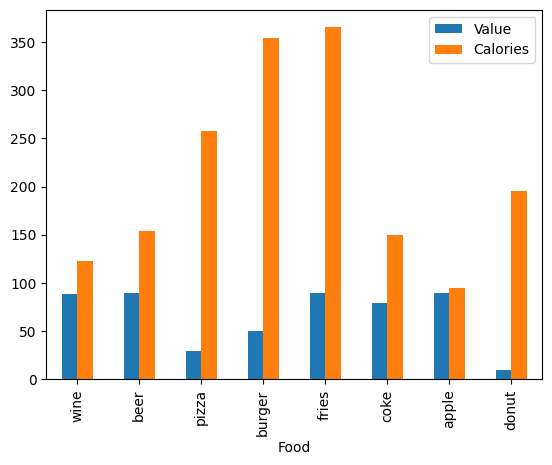

In [7]:
data.plot(kind="bar", x="Food")

---
## B) Tackling the Problem

The objective is to find the set of menu items with the highest value while still amounting to less than or equal to 750 calories.  

For instance, Dave could pick:
- wine
- burger
- donut

Which has a total value of 234 and a total cost of 476 calories. This is a valid choice, but is not optimal.


### Finding an Optimal Solution

Finding an optimal solution is straightforward:

1. Gather all possible sets of items

2. Eliminate invalid sets (i.e. sets with calorie counts larger than 750)

3. Sort the sets by value

4. The first set in the sorted list of sets is the optimal solution


### Implementation

Note: I am not familar enough with Pandas to use it properly, so I'm going to convert the data into a regular Python list.

In [8]:
menu = data.values.tolist()
menu

[['wine', 89, 123],
 ['beer', 90, 154],
 ['pizza', 30, 258],
 ['burger', 50, 354],
 ['fries', 90, 365],
 ['coke', 79, 150],
 ['apple', 90, 95],
 ['donut', 10, 195]]

In [9]:
# Set constant
CALORIE_LIMIT = 750

In [10]:
# Binary Powerset Algorithm
def power_set(set_):
    power_set = []

    power_cardinality = 2**len(set_)

    # the number of binary digits needed
    digit_count = len(set_)

    # setting up the formatting
    format_spec = '0' + str(digit_count) + 'b'

    for n in range(power_cardinality):
        subset = []

        binary_n = format(n, format_spec)

        # for every character in a binary number
        for i, char in enumerate(binary_n):
            if char == '1':
                # when char is 1, the element in set_ with matching index is present in the subset
                subset.append(set_[i])

        power_set.append(subset)

    return power_set

In [16]:
# The powerset is the list of all possible sets of items
menu_power = power_set(menu)

len(menu_power)

256

In [17]:
# Head list elements of the power set
menu_power[:20]

[[],
 [['donut', 10, 195]],
 [['apple', 90, 95]],
 [['apple', 90, 95], ['donut', 10, 195]],
 [['coke', 79, 150]],
 [['coke', 79, 150], ['donut', 10, 195]],
 [['coke', 79, 150], ['apple', 90, 95]],
 [['coke', 79, 150], ['apple', 90, 95], ['donut', 10, 195]],
 [['fries', 90, 365]],
 [['fries', 90, 365], ['donut', 10, 195]],
 [['fries', 90, 365], ['apple', 90, 95]],
 [['fries', 90, 365], ['apple', 90, 95], ['donut', 10, 195]],
 [['fries', 90, 365], ['coke', 79, 150]],
 [['fries', 90, 365], ['coke', 79, 150], ['donut', 10, 195]],
 [['fries', 90, 365], ['coke', 79, 150], ['apple', 90, 95]],
 [['fries', 90, 365],
  ['coke', 79, 150],
  ['apple', 90, 95],
  ['donut', 10, 195]],
 [['burger', 50, 354]],
 [['burger', 50, 354], ['donut', 10, 195]],
 [['burger', 50, 354], ['apple', 90, 95]],
 [['burger', 50, 354], ['apple', 90, 95], ['donut', 10, 195]]]

In [19]:
# Tail list elements of the power set
menu_power[240:]

[[['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354]],
 [['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354],
  ['donut', 10, 195]],
 [['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354],
  ['apple', 90, 95]],
 [['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354],
  ['apple', 90, 95],
  ['donut', 10, 195]],
 [['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354],
  ['coke', 79, 150]],
 [['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354],
  ['coke', 79, 150],
  ['donut', 10, 195]],
 [['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354],
  ['coke', 79, 150],
  ['apple', 90, 95]],
 [['wine', 89, 123],
  ['beer', 90, 154],
  ['pizza', 30, 258],
  ['burger', 50, 354],
  ['coke', 79, 150],
  ['apple', 90, 95],
  ['donut', 10, 195]],
 [['wine', 89, 123],
  ['beer', 90, 154]

To help eliminate invalid sets, I'll write a function which calculates the sum of a given set.

In [20]:
def valid_choice(choice):
    """(list) -> bool
    Given a list of chosen foods, return true if their total cost exceeds CALORIE_LIMIT"""
    total_cost = 0
    for food in choice:
        total_cost += food[2]

    return total_cost < CALORIE_LIMIT

In [22]:
# Collect valid sets
valid_choices = []
for choice in menu_power:
    if valid_choice(choice):
        valid_choices.append(choice)

len(valid_choices)

100

In [23]:
valid_choices[:20]

[[],
 [['donut', 10, 195]],
 [['apple', 90, 95]],
 [['apple', 90, 95], ['donut', 10, 195]],
 [['coke', 79, 150]],
 [['coke', 79, 150], ['donut', 10, 195]],
 [['coke', 79, 150], ['apple', 90, 95]],
 [['coke', 79, 150], ['apple', 90, 95], ['donut', 10, 195]],
 [['fries', 90, 365]],
 [['fries', 90, 365], ['donut', 10, 195]],
 [['fries', 90, 365], ['apple', 90, 95]],
 [['fries', 90, 365], ['apple', 90, 95], ['donut', 10, 195]],
 [['fries', 90, 365], ['coke', 79, 150]],
 [['fries', 90, 365], ['coke', 79, 150], ['donut', 10, 195]],
 [['fries', 90, 365], ['coke', 79, 150], ['apple', 90, 95]],
 [['burger', 50, 354]],
 [['burger', 50, 354], ['donut', 10, 195]],
 [['burger', 50, 354], ['apple', 90, 95]],
 [['burger', 50, 354], ['apple', 90, 95], ['donut', 10, 195]],
 [['burger', 50, 354], ['coke', 79, 150]]]

To help sort the valid choices by value, I'll write a function to calculate the total value of a given choice.

In [24]:
def total_value(choice):
    """(list) -> int
    Given a list of foods, returns the sum of their values."""
    total_value = 0
    for food in choice:
        total_value += food[1]
    return total_value

In [25]:
sorted_choices = sorted(valid_choices, key=total_value, reverse=True)


The optimal menu choice is [['wine', 89, 123], ['beer', 90, 154], ['fries', 90, 365], ['apple', 90, 95]]


In [27]:

print("The optimal menu choice is", sorted_choices[0])
print("Total value:", total_value(sorted_choices[0]))

The optimal menu choice is [['wine', 89, 123], ['beer', 90, 154], ['fries', 90, 365], ['apple', 90, 95]]
Total value: 359


In [28]:
total_cost = 0
for food in sorted_choices[0]:
    total_cost += food[2]

print("Total cost:", total_cost)

Total cost: 737


> This was fun, but my implementation isn't the best. In the course, the data is converted into objects (e.g. there is a Food class). Hmm...I wonder what the best way to carry out this kind of analysis is? Maybe I'll look into this. *Moving on...*

---
## Greedy Algorithms

Finding the optimal solution is computationally expensive, just computing the powerset costs $O(2^n)$! This dataset is small enough that I can be as inefficient as I want, but this does not scale. Greedy algorithms offer a way to determine a "good" (but not optimal) solution in a lot less time.

A greedy algorithm for the 0/1 knapsack problem is:

```
while knapsack is not full:
    put "best" available item into it
```

The definition of "best" is up for debate. It could mean:

- highest value
- lowest cost
- highest ratio of value to cost (value/cost)


### Implementation

Fairly simple:

1. Sort the data set by the criteria we think is "best"

2. Loop through the sorted set, taking items until reaching the limit

In [ ]:
menu

[['wine', 89, 123],
 ['beer', 90, 154],
 ['pizza', 95, 258],
 ['burger', 100, 354],
 ['fries', 90, 365],
 ['cola', 79, 150],
 ['apple', 50, 95],
 ['donut', 10, 195]]

In [29]:
# Sorted from highest to lowest value
by_value = sorted(menu, key=lambda food: food[1], reverse=True)
by_value

[['beer', 90, 154],
 ['fries', 90, 365],
 ['apple', 90, 95],
 ['wine', 89, 123],
 ['coke', 79, 150],
 ['burger', 50, 354],
 ['pizza', 30, 258],
 ['donut', 10, 195]]

In [30]:
# Sorted from smallest to largest cost
by_cost = sorted(menu, key=lambda food: food[2])
by_cost

[['apple', 90, 95],
 ['wine', 89, 123],
 ['coke', 79, 150],
 ['beer', 90, 154],
 ['donut', 10, 195],
 ['pizza', 30, 258],
 ['burger', 50, 354],
 ['fries', 90, 365]]

In [31]:
# Sorted from greatest to least value/cost (i.e. best "bang for your buck")
by_ratio = sorted(menu, key=lambda food: food[1]/food[2], reverse=True)
by_ratio

[['apple', 90, 95],
 ['wine', 89, 123],
 ['beer', 90, 154],
 ['coke', 79, 150],
 ['fries', 90, 365],
 ['burger', 50, 354],
 ['pizza', 30, 258],
 ['donut', 10, 195]]

In [32]:
def order_to_limit(menu, criteria):
    """(list, str) -> None
    Given a menu, orders as many items as possible (until reaching CALORIE_LIMIT).
    Prints the results."""
    cost = 0
    value = 0
    ordered = []
    for food in menu:
        f_cost = food[2]
        f_value = food[1]
        f_name = food[0]

        # If the calorie cost + calories already consumed does not exceed limit
        if ((cost + f_cost) < CALORIE_LIMIT):
            # Order the food
            cost += f_cost
            value += f_value
            ordered.append(f_name)

    print("With {} criteria:".format(criteria))
    print("    food ordered:", ordered)
    print("    total calories:", cost)
    print("    total value:", value)

In [33]:
# Run some computations, print the results
order_to_limit(by_value, "VALUE")
print()
order_to_limit(by_cost, "COST")
print()
order_to_limit(by_ratio, "RATIO")

With VALUE criteria:
    food ordered: ['beer', 'fries', 'apple', 'wine']
    total calories: 737
    total value: 359

With COST criteria:
    food ordered: ['apple', 'wine', 'coke', 'beer', 'donut']
    total calories: 717
    total value: 358

With RATIO criteria:
    food ordered: ['apple', 'wine', 'beer', 'coke', 'donut']
    total calories: 717
    total value: 358


For comparison,

```
Optimal solution:
    food ordered: ['wine', 'beer', 'pizza', 'cola']
    total calories: 685
    total value: 353
```



Though none of the greedy results matched the optimal solution, they were close. They are also far more efficient; $O(n \log n)$, if I'm not mistaken.

> **TL;DR**: *Dave should order wine, beer, pizza, and a cola. *
>
> **DAVE:** "Three drinks and a pizza isn't a meal."
>
> **SCIENTIST:** "FOOL! You should have been more specific with your constraints!"

<hr>

# Extra Bits - Plotting the Search Space

Remember the set of all possible *valid* orders? I think it would be neat to see visually.

## The Data

In [ ]:
# From earlier
valid_choices

[[],
 [['donut', 10, 195]],
 [['apple', 50, 95]],
 [['apple', 50, 95], ['donut', 10, 195]],
 [['cola', 79, 150]],
 [['cola', 79, 150], ['donut', 10, 195]],
 [['cola', 79, 150], ['apple', 50, 95]],
 [['cola', 79, 150], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365]],
 [['fries', 90, 365], ['donut', 10, 195]],
 [['fries', 90, 365], ['apple', 50, 95]],
 [['fries', 90, 365], ['apple', 50, 95], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150]],
 [['fries', 90, 365], ['cola', 79, 150], ['donut', 10, 195]],
 [['fries', 90, 365], ['cola', 79, 150], ['apple', 50, 95]],
 [['burger', 100, 354]],
 [['burger', 100, 354], ['donut', 10, 195]],
 [['burger', 100, 354], ['apple', 50, 95]],
 [['burger', 100, 354], ['apple', 50, 95], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 79, 150]],
 [['burger', 100, 354], ['cola', 79, 150], ['donut', 10, 195]],
 [['burger', 100, 354], ['cola', 79, 150], ['apple', 50, 95]],
 [['burger', 100, 354], ['fries', 90, 365]],
 [['pizza', 9

## The Plan

**x-axis**: The set ID (a meaningless number corresponding to an individual set in the list of sets).

**y-axis**: Represents the numerical pleasure value for a particular set

**Chart type**: Line

## Data Prep

So, I think I can achieve my goal by creating a list and filling each position with the total value of each list. Then convert to a pandas series. Finally, create the plot.

In [34]:
summed_values = []

for s in valid_choices:
    summed_values.append(total_value(s))

In [35]:
summed_values = pd.Series(summed_values)
summed_values

0       0
1      10
2      90
3     100
4      79
     ... 
95    319
96    209
97    219
98    299
99    288
Length: 100, dtype: int64

[Text(0.5, 0, 'Order #'), Text(0, 0.5, 'Total pleasure value')]

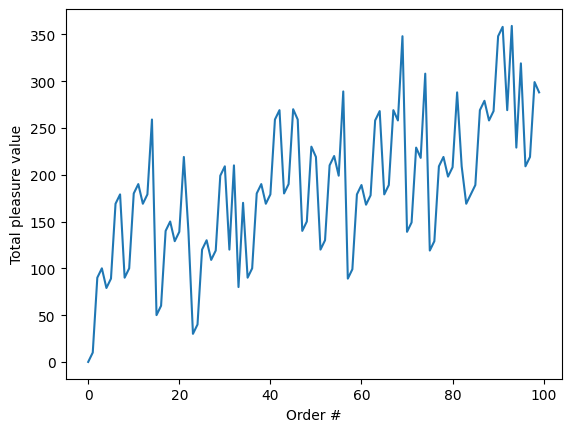

In [36]:
value_plot = summed_values.plot()
value_plot.set(xlabel="Order #", ylabel="Total pleasure value")

Neat!

## More Nonsense

To get more experience with these tools, I want to do a bit more. I'm going to add total calorie cost to the plot.

In [37]:
def total_cost(choice):
    """(list) -> int
    Given a list of foods, returns the sum of their costs."""
    total_cost = 0
    for food in choice:
        total_cost += food[2]
    return total_cost

In [ ]:
summed_costs = []

for s in valid_choices:
    summed_costs.append(total_cost(s))

summed_costs

In [39]:
cost_value_data = pd.DataFrame({'Total pleasure': summed_values, 'Total cost': summed_costs})
cost_value_data

,Total pleasure,Total cost
0,0,0
1,10,195
2,90,95
3,100,290
4,79,150
...,...,...
95,319,726
96,209,535
97,219,730
98,299,630


[Text(0.5, 0, 'Order #'), Text(0, 0.5, 'Total value')]

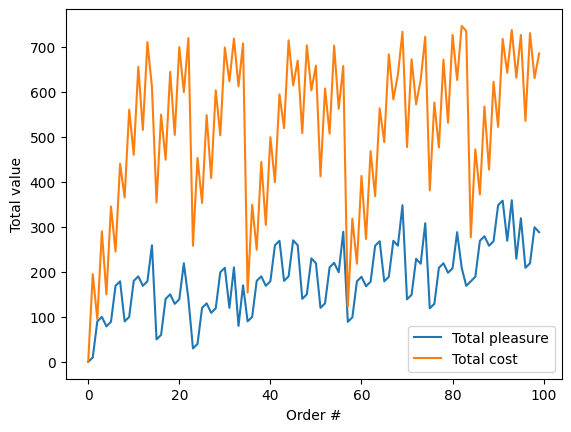

In [40]:
cvp = cost_value_data.plot()
cvp.set(xlabel="Order #", ylabel="Total value")